# SPAM MESSAGES – MACHINE LEARNING

## Abstract
Multiple Goals:
- Find out which method (Logistic Regression, BernoulliNB, MultinomialNB) was the best at determining whether the message was spam or ham
- Using a count vectorizor to make predictions and determine the success of this method in comparison to the other three methods
- Produce a user interface that allows users to interact with the machine learning algorithms (with a website) 

## Table of Contents
* [Introduction](#Introduction)
* [Imports](#Imports)
* [The Data Set](#Section-One:-The-Data-Set)
   * [The Original Data Set](#The-Original-Data-Set)
       * [Importing the Data](#Importing-the-Data-and-Describing-the-Data-Set)
       * [Original Variable Definitions](#Original-Variable-Definitions)
   * [Cleaning the Data & Feature Engineering](#Cleaning-the-Data-and-Feature-Engineering)
       * [Feature Engineering](#Feature-Engineering)
       * [New Variable Definitions](#New-Variable-Definitions)
       * [Word Bank for each Variable](#Word-Bank-for-each-Variable)
       * [Most Common Spam and Ham Words](#Selecting-the-Thirty-Most-Common-Spam-and-Ham-Words)
* [Visualizations](#Section-Two:-Visualization-of-Spam-Dataframe-Variables)
    * [Mean Length of Message](#Visualization-One:-Mean-Length-of-Message-for-Spam-and-Ham)
    * [Mean Number of Non-Alphanumeric Characters](#Visualization-Two:-Mean-Number-of-Non-Alphanumeric-Characters-for-Spam-and-Ham)
    * [Mean Number of Winning References](#Visualization-Three:-Mean-Number-of-Winning-References-for-Spam-and-Ham)
    * [Mean Number of Website References](#Visualization-Four:-Mean-Number-of-Website-References-for-Spam-and-Ham)
    * [Mean Number of Phone References](#Visualization-Five:-Mean-Number-of-Phone-References-for-Spam-and-Ham)
    * [Mean Number of Money References](#Visualization-Six:-Mean-Number-of-Money-References-for-Spam-and-Ham)
    * [Mean Number of Greetings](#Visualization-Seven:-Mean-Number-of-Greetings-for-Spam-and-Ham)
    * [Number of Spam Words vs. Ham Words](#Visualization-Eight:-Number-of-Spam-Words-vs.-Ham-Words-for-Spam-and-Ham-Messages)
* [Significance Testing](#Section-Three:-Significance-Testing)
* [Spam Detection Testing](#Section-Four:-Spam-Detection-Tests)
    * [Preparing the Training and Testing Data](#Preparing-the-Training-and-Testing-Data)
    * [Logistic Regression](#Logistic-Regression-Test)
    * [Multinomial Naive Bayes](#Multinomial-Naive-Bayes-Test)
    * [Bernoulli Naive Bayes](#Bernoulli-Naive-Bayes-Test)
        * [Preparing the Dataframe](#Preparing-the-BNB-Dataframe)
        * [Performing the Test](#Performing-the-BNB-Test)
    * [Count Vectorizer](#Count-Vectorizer-Test)
        * [Preparing the Dataframe](#Preparing-the-CV-Test)
        * [Performing the Test](#Performing-the-CV-Test)
* [Results & Conclusions](#Results-and-Conclusions)
* [Citations & References](#Citations-and-References)







## Introduction

## Imports

In [73]:
# Imports 

# Packages Required for Visualization & Feature Engineering
import numpy as np 
import pandas as pd
import seaborn as sns
import math
import copy
import sklearn
from collections import Counter

# Functions Required for Confusion Matrices
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Functions Required for Constructing Training and Testing Data Sets 
from sklearn.model_selection import train_test_split

# Functions Required for Different Methods of Machine Learning
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm 

# Functions Required for Evaluating Results
from sklearn.metrics import accuracy_score
from sklearn import metrics 

# Removing Warnings
import warnings
warnings.filterwarnings('ignore')

# Committing & Pushing to Git
! git add . 
! git commit -m "Adding Visualization Descriptions"
! git push

[main 85a833f] Adding Visualization Descriptions
 1 file changed, 78 insertions(+), 57 deletions(-)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 8 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 165.35 KiB | 9.19 MiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/jacksteel5314/SpamDetectionML.git
   68db94e..85a833f  main -> main


## Section One: The Data Set
Section one deals with importing the data set and feature engineering it to include variables that will be used in the Logistic Regression, Multinomial Naive Bayes, and Bernoulli Naive Bayes. 
### The Original Data Set
#### Importing the Data and Describing the Data Set
The import data set is a csv file obtained from https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset. The owner of the data set is UCI Machine Learning and the data set was last updated about seven years ago. The data set is named "SMS Spam Collection Data Set" and it contains 5 columns and 5572 observations. The first column is named v1 and contains string values `spam` and `ham`. The second column is named v2 and contains string values denoting the sms message sent. The third, fourth, and fifth columns contain primarily null (NaN) values for most observations. 13.4% of the data set is spam messages and 86.6% of the data set is ham messages. 

In [48]:
df = pd.read_csv("spam.csv", encoding='cp1252')
print("Number of Observations: ", len(df))
print("Number of Columns: ", len(df.columns))
print("Proportion of Spam Messages: ", len(df[df["v1"] == "spam"])/len(df))
print("Proportion of Ham Messages: ", len(df[df["v1"] == "ham"])/len(df))
df.head()

Number of Observations:  5572
Number of Columns:  5
Proportion of Spam Messages:  0.13406317300789664
Proportion of Ham Messages:  0.8659368269921034


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### Original Variable Definitions

The table below displays the variables that appear in the original data set and their definitions. 

|Variables|Definitions| 
|--- |----------| 
| `v1` | Contains string values `spam` and `ham` denoting to whether the message is spam or ham |
| `v2` | Contains a string value showing the email message |  
| `Unnamed: 2` | Contains NaN values, except for a few observations | 
| `Unnamed: 3` | Contains NaN values, except for a few observations |
| `Unnamed: 4` | Contains NaN values, except for a few observations |  

### Cleaning the Data & Feature Engineering
#### Replacing Unused Variables & Feature Engineering 
The first data frame, `spam_df`, will be a feature engineered version of the original data frame `df`. The new `spam_df` data frame will replace the `v1` and `v2` columns with the column names `Spam?` and `Message` respectively, and the `Spam?` column will now include integer value 0 if the message is `ham` and integer value 1 if the message is `spam`. As well, this data frame will drop the unnamed columns (`Unnamed: 2`, `Unnamed: 3`, and `Unnamed: 4`). 

Using feature engineering, new columns are added to the data frame to increase the number of factors influencing the results of the logistic regression and multinomial naive bayes tests. These new columns include `num_phone_related`, `num_winner`, `greetings`, `num_of_website`, `num_rand_letters`, `num_money`, `length_of_mess`, `spam_word_count`, and `ham_word_count`, which are all defined in the data preceding the displayed data frame. 

The `spam_word_count` and `ham_word_count` columns feature integer values counting the number of appearances of a 'spam' words and 'ham' words in each message. 'Spam' words are defined as the top thirty words that appear in spam messages in the data set. 'Ham' words are defined as the top thirty words that appear in ham messages in the data set. These words are listed in a table below the variable definitions.

In [49]:
# Removing Excess Columns and Renaming
spam_df = df[["v1", "v2"]]
spam_df["Spam?"] = np.where(spam_df["v1"] == "spam", 1, 0)
spam_df = spam_df[["Spam?", "v2"]]
spam_df.rename(columns = {"v2": "Message"}, inplace=True)

# Feature Engineering New Variables
spam_df["num_phone_related"] = spam_df["Message"].str.lower().str.count("msg|sms|message|mobile|phone|call|txt|text|texting|send|reply") 
spam_df["num_winner"] = spam_df["Message"].str.lower().str.count("winner|congratulations|prize|jackpot|claim|vacation|cash|free|won|win|winning|iphone|money|ipad|cash") 
spam_df["greetings"] = spam_df["Message"].str.lower().str.count("hello|hi|what's up|whats up|sup|hey|heyy|heyyy|welcome|whatsup|hola|greetings|by|from")
spam_df["num_of_website"] = spam_df["Message"].str.lower().str.count("http|www|.com|.net|website|link|web|site|click|.gov") 
spam_df["num_rand_letters"] = spam_df["Message"].str.count("!|@|#|$|%|^|&|>|<|/+|=") - 2
spam_df["num_money"] = spam_df["Message"].str.lower().str.count("$|money|cash|card|free|credit|pay|venmo|cashapp|dollars|credits|dollar|cards") - 1
spam_df["length_of_mess"] = [len(mess) for mess in spam_df["Message"]]
spam_df["spam_word_count"] = spam_df["Message"].str.count("to|a|call|your|you|the|for|or|free|2|is|ur|on|txt|have|from|and|u|text|mobile|with|claim|reply|&|of|now|4|stop|our|this")
spam_df["ham_word_count"] = spam_df["Message"].str.count("i|you|to|the|a|u|and|in|my|is|me|of|for|that|it|have|your|but|are|so|not|on|at|i'm|can|if|do|will|be")
spam_df[:5]


,Spam?,Message,num_phone_related,num_winner,greetings,num_of_website,num_rand_letters,num_money,length_of_mess,spam_word_count,ham_word_count
0,0,"Go until jurong point, crazy.. Available only ...",0,0,0,0,0,0,111,17,20
1,0,Ok lar... Joking wif u oni...,0,0,0,0,0,0,29,3,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2,2,0,1,1,1,155,19,16
3,0,U dun say so early hor... U c already then say...,0,0,0,0,0,0,49,8,8
4,0,"Nah I don't think he goes to usf, he lives aro...",0,0,1,0,0,0,61,7,9


#### New Variable Definitions
The table below displays the variables that appear in the new data frame and their definitions. 

|Variables|Definitions| 
|--- |----------| 
| `Spam?` | Contains integer values 0, denoting to "Spam", and 1, denoting to "Ham" |
| `Message` | Contains a string value showing the email message |  
| `Num_Phone_Related` | Contains an integer value counting the number of times the message references a phone or a characteristic of a phone (see below) | 
| `Num_Winner` | Contains an integer value counting the number of times the message references winning or a characteristic of winning (see below) |
| `Greetings` | Contains an integer value counting the number of times the message contains a greeting (see below) |  
| `Num_Website` | Contains an integer value counting the number of times the message references a website or a characteristic of a website (see below)| 
| `Num_Rand_Letters` | Contains an integer value counting the number of times the message includes a non-alphanumeric character (see below) |
| `Num_Money` | Contains and integer value counting the number of times the message references money or a characteristic of money (see below) |
| `Length_of_Mess` | Contains an integer value that represents the length of the message in characters |
| `Spam_Word_Count` | Contains an integer value that represents the number of times the message contains a word listed in the top thirty words in spam messages (see below) |
| `Ham_Word_Count` | Contains an integer value that represents the number of times the message contains a word listed in the top thirty words in ham messages (see below) |

#### Word Bank for each Variable
The table below displays the variable that appear in the new data frame defined above with a list of words that they count for when iterating through each message in the `Message` column of the new data frame.

| `num_phone_related` | `num_winner` | `greetings` | `num_website` | `num_rand_letters` | `num_money` | 
|---|---|---|---|---|---|
| msg | winner | hello | http | !| \$ | 
| sms | congratulations | hi | www| @ | money |
| message | prize | what's up | .com | # | cash |
| mobile | jackpot | sup | .net | \$ | card |
| phone | claim | hey | website | % | free |
| call | vacation | heyy | link | ^ | credit |
| txt | cash | heyyy | web | & | pay |
| text | free | welcome | site | > | venmo |
| texting | won | hola | .gov | < | cashapp |
| send | win | greetings |  | + | dollars |
| reply | winning | whatsup |  | = | credits |
|  | iphone | by |  |  | dollar |
|  | money | from |  |  | cards |
|  | ipad |  |  |  |  |
|  | cash |  |  |  |  |

#### Selecting the Thirty Most Common Spam and Ham Words
This barplot displays the thirty words that were found most often in messages labeled as spam in the data set, as well as the amount of times they appeared. As can be seen, some of the most common spam words that may play a roll in determining whether the message is spam or ham are 'call', 'free', 'txt', 'text', 'mobile', 'claim', and 'reply.'

[Text(0.5, 1.0, 'Most Common Spam Words')]

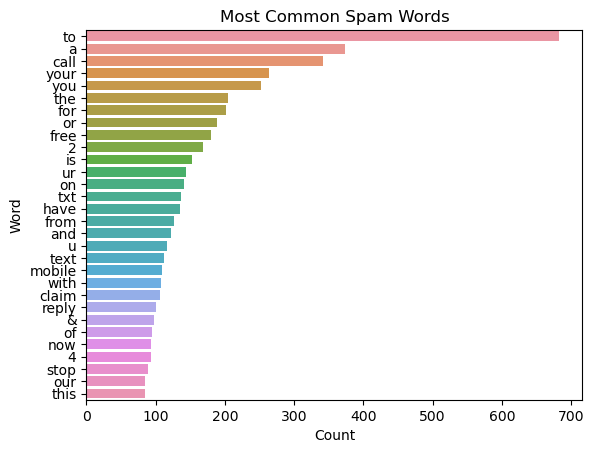

In [50]:
# Spam Most Common Words
spam_only = spam_df[spam_df["Spam?"] == 1]
spam_words = ""
for message in spam_only["Message"]:
    spam_words = spam_words.lower() + " " + message
spam_word_array = spam_words.split(" ")
spam_most_common = Counter(spam_word_array).most_common(30)
spam_words_df = pd.DataFrame(spam_most_common, columns = ["Word", "Count"])

# Barplot for Most Common Spam Words
sns.barplot(data=spam_words_df, x="Count", y="Word").set(title="Most Common Spam Words")

This barplot displays the thirty words that were found most often in messages labeled as spam in the data set, as well as the amount of times they appeared. As can be seen, some of the most common spam words that may play a roll in determining whether the message is spam or ham are 'can', 'have', 'u', 'but', 'if', 'do', and 'will.'

[Text(0.5, 1.0, 'Most Common Ham Words')]

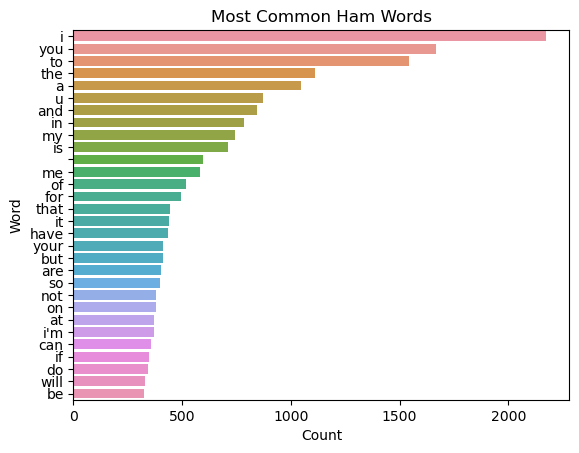

In [51]:
# Ham Most Common Words 
ham_only = spam_df[spam_df["Spam?"] == 0]
ham_words = ""
for message in ham_only["Message"]:
    ham_words = ham_words.lower() + " " + message
ham_word_array = ham_words.split(" ")
ham_most_common = Counter(ham_word_array).most_common(30)
ham_words_df = pd.DataFrame(ham_most_common, columns = ["Word", "Count"])

# Barplot for Most Common Ham Words
sns.barplot(data=ham_words_df, x="Count", y="Word").set(title="Most Common Ham Words")

## Section Two: Visualization of Spam Dataframe Variables
Section two features seaborn visualizations of the new variables (columns) added to the data frame in section one. These visualizations include barplots and scatterpots. 
### Visualization One: Mean Length of Message for Spam and Ham
Visualization one is a barplot with the `Spam?` variable on the x-axis and mean `length_of_mess` on the y-axis, labeled as 'Spam' and 'Length of Message' respectively. The blue bar represents the mean length of ham messages and the orange bar represents the mean length of spam messages. The black line at the top of both the blue and orange bars represents the margin of error. As you can see by the diagram, the mean length of message for Spam messages (138.866) is almost double the mean length of message for Ham messages (71.0236). That being said, this variable can be useful in determining whether a message is spam or ham, as longer messages tend to be spam messages. 

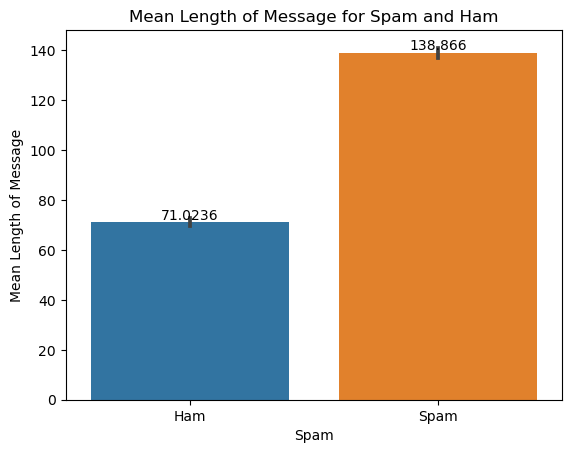

In [52]:
# Mean Length of Message for Spam and Ham 
plot_one_data = spam_df
plot_one_data["Variable"] = np.where(plot_one_data["Spam?"] ==1, "Spam", "Ham")
plot_one = sns.barplot(data=plot_one_data, y="length_of_mess", x="Variable")
plot_one.set(xlabel="Spam", ylabel="Mean Length of Message", title="Mean Length of Message for Spam and Ham")
for i in plot_one.containers:
    plot_one.bar_label(i,)

### Visualization Two: Mean Number of Non-Alphanumeric Characters for Spam and Ham
Visualization two is a barplot with the `Spam?` variable on the x-axis and the mean `num_rand_letters` on y-axis, labeled 'Spam' and 'Mean Number of Non-Alphanumeric Characters' respectively. The blue bar represents the mean number of non-alphanumeric characters for ham messages and the orange bar represents the mean number of non-alphanumeric characters for spam messages. The black lines on the top on both boxes display the margin of error. The margin of error for the orange spam bar is significantly larger than the margin of error for the blue ham bar, pointing towards the fact that there is a greater variation in number of non-alphanumeric character values for spam messages in comparison to ham messages. As the barplot shows, the mean number of non-alphanumeric characters is also greater for spam messages (1.55957) in comparison to ham messages (0.402694) by over three times. This might indicate the messages with greater amounts of non-alphanumeric characters might be spam messages and can be useful when running the logistic regression, multinomial Naive Bayes, and bernoulli Naive Bayes tests. See the [Non-Alphanumeric Characters](#Word-Bank-for-each-Variable) here. 

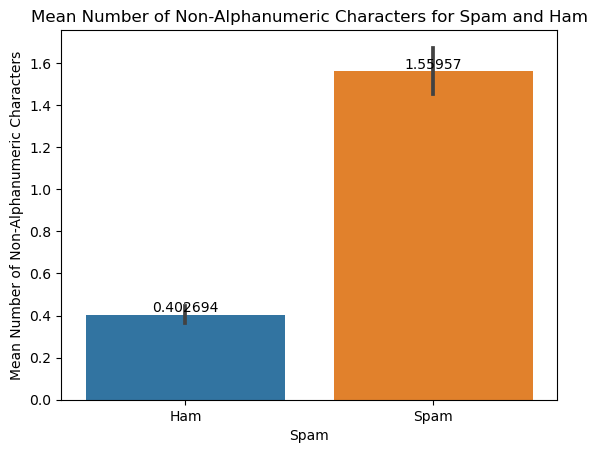

In [53]:
# Mean Number of Non-Alphanumeric for Spam and Ham 

plot_two_data = spam_df
plot_two_data["Variable"] = np.where(plot_two_data["Spam?"] ==1, "Spam", "Ham")
plot_two = sns.barplot(data=plot_two_data, y="num_rand_letters", x="Variable")
plot_two.set(xlabel="Spam", ylabel="Mean Number of Non-Alphanumeric Characters", title="Mean Number of Non-Alphanumeric Characters for Spam and Ham")
for i in plot_two.containers:
    plot_two.bar_label(i,)

### Visualization Three: Mean Number of Winning References for Spam and Ham
Visualization three is a barplot with the `Spam?` variable on the x-axis and the mean `num_winner` on y-axis, labeled 'Spam' and 'Mean Number of Winning References' respectively. The blue bar represents the mean number of winning references for ham messages and the orange bar represents the mean number of winning references for spam messages. The black lines on the top on both boxes display the margin of error. The margin of error for the orange spam bar is significantly larger than the margin of error for the blue ham bar, pointing towards the fact that there is a greater variation in number of winning references for spam messages in comparison to ham messages. As the barplot shows, the mean number of winning references is also greater for spam messages (1.03614) in comparison to ham messages (0.0636269) by over seventeen times. This might indicate the messages with greater amounts of winning references might be spam messages and can be useful when running the logistic regression, multinomial Naive Bayes, and bernoulli Naive Bayes tests. However, the data is limited in that the difference between the mean number of winning references for spam and ham is less than one. Therefore, there isn't much of a discrepency between the number of winning references that may appear in a spam message in comparison to the number of winning references that may appear in a ham message, and it may be hard to differentiate when constructing the machine learning model. See the [Winning References](#Word-Bank-for-each-Variable) here. 

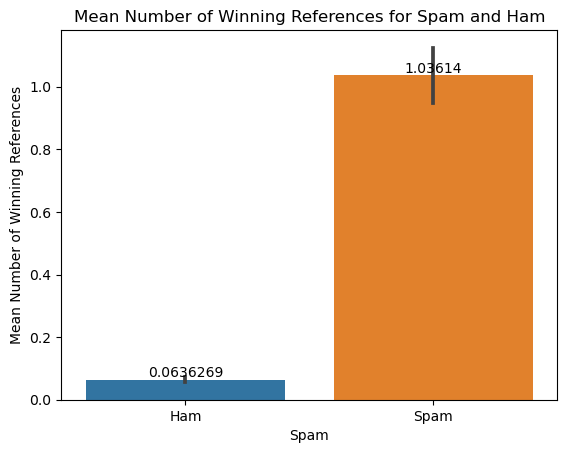

In [54]:
# Mean Number of Winning References for Spam and Ham 

plot_three_data = spam_df
plot_three_data["Variable"] = np.where(plot_one_data["Spam?"] ==1, "Spam", "Ham")
plot_three = sns.barplot(data=plot_three_data, y="num_winner", x="Variable")
plot_three.set(xlabel="Spam", ylabel="Mean Number of Winning References", title="Mean Number of Winning References for Spam and Ham")
for i in plot_three.containers:
    plot_three.bar_label(i,)

### Visualization Four: Mean Number of Website References for Spam and Ham
Visualization four is a barplot with the `Spam?` variable on the x-axis and the mean `num_of_website` on y-axis, labeled 'Spam' and 'Mean Number of Website References' respectively. The blue bar represents the mean number of website references for ham messages and the orange bar represents the mean number of website references for spam messages. The black lines on the top on both boxes display the margin of error. The margin of error for the orange spam bar is significantly larger than the margin of error for the blue ham bar, indicating that there is a greater variation in number of website references for spam messages in comparison to ham messages. As the barplot shows, the mean number of website references is also greater for spam messages (0.427041) in comparison to ham messages (0.0974093) by over four times. This might indicate the messages with greater amounts of website references, or links to websites, might be spam messages and can be useful when running the logistic regression, multinomial Naive Bayes, and bernoulli Naive Bayes tests. As with the previous comparison in visualization three, however, the data is limited in that the difference between the mean for spam and ham messages is less than one – even less than 0.4. Considering also that the margin of error is large for the spam messages bar, the discrepency in website references for ham messages and spam message is not that large and this might not be the most beneficial variable when creating the machine learning model. See the [Website References](#Word-Bank-for-each-Variable) here. 

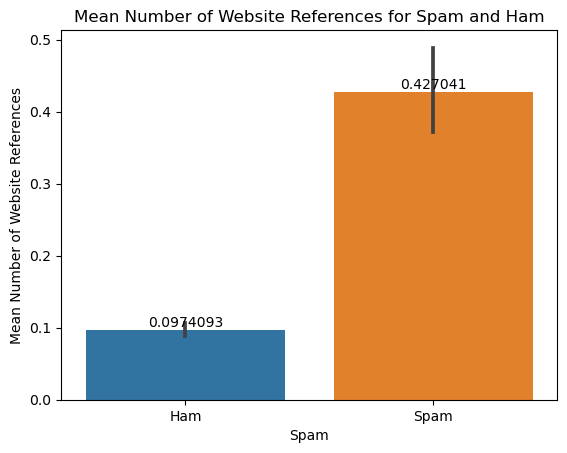

In [55]:
# Mean Number of Website References for Spam and Ham

plot_four_data = spam_df
plot_four_data["Variable"] = np.where(plot_four_data["Spam?"] ==1, "Spam", "Ham")
plot_four = sns.barplot(data=plot_four_data, y="num_of_website", x="Variable")
plot_four.set(xlabel="Spam", ylabel="Mean Number of Website References", title="Mean Number of Website References for Spam and Ham")
for i in plot_four.containers:
    plot_four.bar_label(i,)

### Visualization Five: Mean Number of Phone References for Spam and Ham
Visualization five is a barplot with the `Spam?` variable on the x-axis and the mean `num_phone_related` on y-axis, labeled 'Spam' and 'Mean Number of Phone References' respectively. The blue bar represents the mean number of phone references for ham messages and the orange bar represents the mean number of phone references for spam messages. The black lines on the top on both boxes display the margin of error. The margin of error is relatively similar, indicating that there is a similar degree of variation in number of phone references for spam messages and for ham messages. As the barplot shows, the mean number of phone references is greater for spam messages (1.90228) in comparison to ham messages (0.188394) by over ten times. This might indicate the messages with greater amounts of phone references might be spam messages and can be useful when running the logistic regression, multinomial Naive Bayes, and bernoulli Naive Bayes tests. The difference in the mean phone references for spam messages and the mean phone references for ham messages appears relatively large, indicating that the assumption that a message with a high about of phone references (~2) is more likely to be spam could be a plausible assumption. See the [Phone References](#Word-Bank-for-each-Variable) here. 

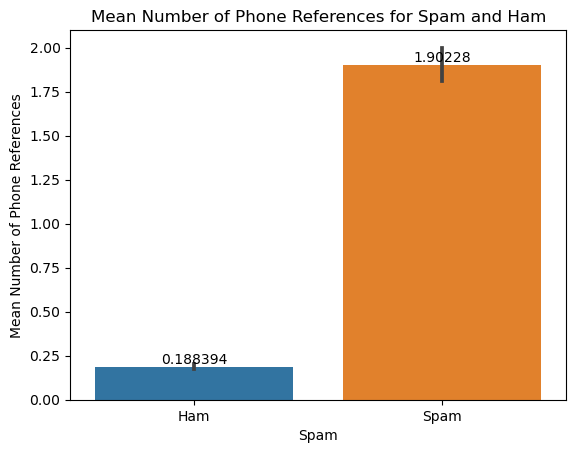

In [56]:
# Mean Number of Phone References for Spam and Ham
plot_five_data = spam_df
plot_five_data["Variable"] = np.where(plot_five_data["Spam?"] ==1, "Spam", "Ham")
plot_five = sns.barplot(data=plot_five_data, y="num_phone_related", x="Variable")
plot_five.set(xlabel="Spam", ylabel="Mean Number of Phone References", title="Mean Number of Phone References for Spam and Ham")
for i in plot_five.containers:
    plot_five.bar_label(i,)

### Visualization Six: Mean Number of Money References for Spam and Ham
Visualization six is a barplot with the `Spam?` variable on the x-axis and the mean `num_money` on y-axis, labeled 'Spam' and 'Mean Number of Money References' respectively. The blue bar represents the mean number of money references for ham messages and the orange bar represents the mean number of money references for spam messages. The black lines on the top on both boxes display the margin of error. The margin of error for the orange spam bar is significantly larger than the margin of error for the blue ham bar, pointing towards the fact that there is a greater variation in number of money references for spam messages in comparison to ham messages. As the barplot shows, the mean number of money references is also greater for spam messages (0.496653) in comparison to ham messages (0.0460104) by over ten times. This might indicate the messages with greater amounts of money references might be spam messages and can be useful when running the logistic regression, multinomial Naive Bayes, and bernoulli Naive Bayes tests. However, the data is limited in that the difference between the mean number of money references for spam and ham is less than one (even less that 0.5). This means that spam messages are more likely to have a money reference than a ham message, but this value is either one or a rare high number case. On the flip side, ham messages typically have zero references to money. Therefore, there isn't much of a discrepency between the number of money references that may appear in a spam message in comparison to the number of money references that may appear in a ham message, and it may be hard to differentiate when constructing the machine learning model. See the [Money References](#Word-Bank-for-each-Variable) here. 

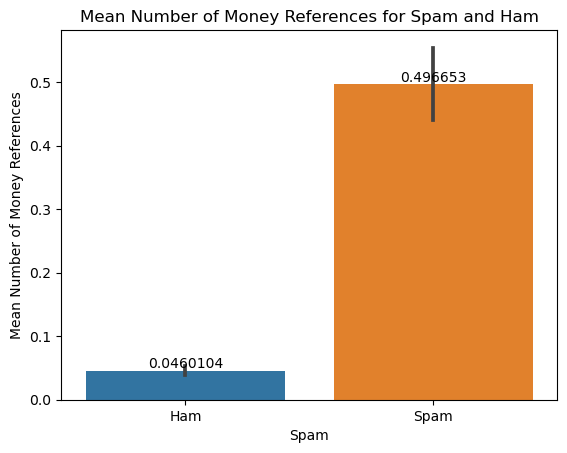

In [57]:
# Mean Number of Money References for Spam and Ham 
plot_six_data = spam_df
plot_six_data["Variable"] = np.where(plot_six_data["Spam?"] ==1, "Spam", "Ham")
plot_six = sns.barplot(data=plot_six_data, y="num_money", x="Variable")
plot_six.set(xlabel="Spam", ylabel="Mean Number of Money References", title="Mean Number of Money References for Spam and Ham")
for i in plot_six.containers:
    plot_six.bar_label(i,)

### Visualization Seven: Mean Number of Greetings for Spam and Ham
Visualization seven is a barplot with the `Spam?` variable on the x-axis and the mean `greetings` on y-axis, labeled 'Spam' and 'Mean Number of Greetings' respectively. The blue bar represents the mean number of  greetings for ham messages and the orange bar represents the mean number of greetings for spam messages. The black lines on the top on both boxes display the margin of error. The margin of error for the orange spam bar is significantly larger than the margin of error for the blue ham bar, pointing towards the fact that there is a greater variation in number of money references for spam messages in comparison to ham messages. This might indicate that spam messages can have, on occasion, very low values and very high values, whereas not so much with ham messages. As the barplot shows, the mean number of greetings is also greater for spam messages (0.5556894) in comparison to ham messages (0.459482). However, the difference between these mean values is only .0962074 indicating that there isn't any (appearingly) significant difference in the number of greetings for spam and ham messages. Therefore, the `greetings` variable might not be the best variable for determining whether or not the message is spam or ham. See the [Greetings](#Word-Bank-for-each-Variable) here. 

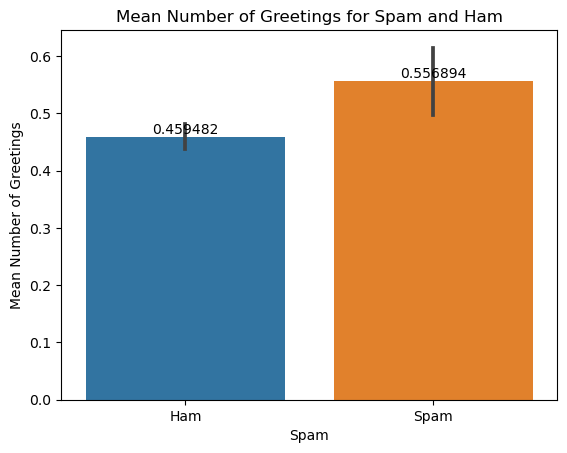

In [58]:
# Mean Number of Greetings for Spam and Ham 
plot_seven_data = spam_df
plot_seven_data["Variable"] = np.where(plot_seven_data["Spam?"] ==1, "Spam", "Ham")
plot_seven = sns.barplot(data=plot_seven_data, y="greetings", x="Variable")
plot_seven.set(xlabel="Spam", ylabel="Mean Number of Greetings", title="Mean Number of Greetings for Spam and Ham")
for i in plot_seven.containers:
    plot_seven.bar_label(i,)

### Visualization Eight: Number of Spam Words vs. Ham Words for Spam and Ham Messages
Visualization eight is a scatterplot with the `spam_word_count` variable on the x-axis and the `ham_word_count` variable on the y-axis, labeled as 'Number of Spam Words' and 'Number of Ham Words' respectively. The key indicates the third variable incorporated into the visualization – `Spam?`. Blue points on the scatterplot represent ham messages and orange points on the scatterplot represent spam messages. Overall, this scatterplot intends to show the distribution for number of ham words in a given message in comparison to the number of spam words in a given message – therefore, each point has a value for number of ham words and a value for number of spam words. As can be seen by the scatterplot, the majority of the points clump in the lower portion of the plot, between 0 and 50 ham words and between 0 and 40 spam words. Number of ham words and spam words for ham message appear to skew right with some apparent outliers with over 75 ham messages and 80 spam messages. As the diagram shows, spam messages tend to have a larger number of spam words in comparison to ham messages with the same number of ham messages. This relationship is flipped for ham messages and ham words, as ham messages tend to have a higher number of ham words then spam messages with the same number of spam words. This trend is expected as a spam message will likely have more words within the top 30 spam words than the top 30 ham words, and vice versa. In total, this graph visualizes a trend that can be useful when running the logistic regression, bernoulli Naive Bayes, and the multinomial Naive Bayes tests, as spam messages are more likely to have spam words and ham messages are more likely to have ham words. See [Spam and Ham Words](#Selecting-the-Thirty-Most-Common-Spam-and-Ham-Words) here. 

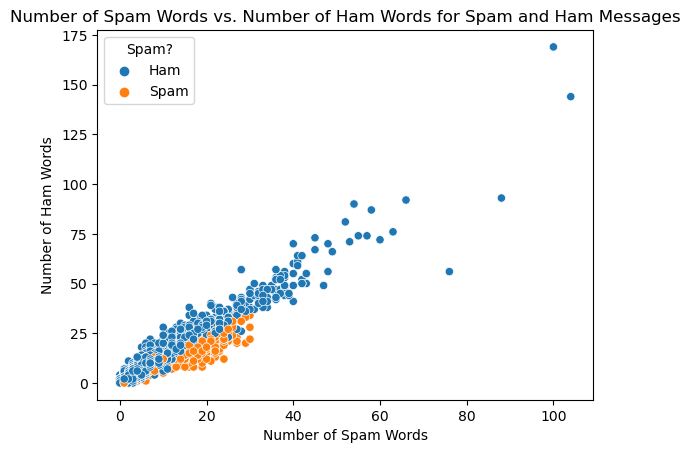

In [59]:
# Number of Spam Words vs. Number of Ham Words for Spam and Ham Messages
plot_eight_data = spam_df
plot_eight_data["Variable"] = np.where(plot_eight_data["Spam?"] ==1, "Spam", "Ham")
plot_eight = sns.scatterplot(data=plot_eight_data, y="ham_word_count", x="spam_word_count", hue = "Variable")
plot_eight.set(xlabel="Number of Spam Words", ylabel="Number of Ham Words", title="Number of Spam Words vs. Number of Ham Words for Spam and Ham Messages")
plot_eight.legend(title='Spam?')
for i in plot_eight.containers:
    plot_eight.bar_label(i,)

## Section Three: Significance Testing

## Section Four: Spam Detection Tests
This next section contains the tests performed to actually determine whether a message is spam or ham. It features a section preparing the training and testing that will be used in the logistic regression and multinomial Naive Bayes test, and sections for the four tests: logistic regression, Multinomial Naive Bayes, Bernoulli Naive Bayes, and count vectorizer. Each test produces an accuracy score determining how well the test predicted whether a message was spam or ham. 
### Preparing the Training and Testing Data
The first section, "Preparing the Training and Testing Data," shows the production of the training and testing dataframes. The code first drops the `Spam?`, `Message`, and `Variable` columns. The `Spam?` column is dropped, as this is the target value (the y-value being predicted) and should not be factored in as a variable. The same goes for the `Variable` column, as it is the y-value being predicted. `Message` is dropped as we have broken in this x-value input into several variables and no longer need to include message. The target dataframe being used is the `Variable` column, as we are attempting to predict the values of this column for the testing dataframe – in other words, we are predicting whether the message is spam or ham, which is shown in the `Variable` column. Then, using the train_test_split method of sklearn package, we split the data into a training and testing set, the training set being 80% of the data and the testing set being 20% of the data. The random_state seed is 999. The x-values of the first five messages in the training data are shown below.

In [60]:
# Test One: Preparing the Training and Testing Data

spam_data = spam_df.drop(columns=["Spam?", "Message", "Variable"])
spam_target = spam_df["Variable"]
X_train, X_test, y_train_target, y_test_target = train_test_split(spam_data, spam_target, test_size = 0.2, random_state=999)
X_train.head()

,num_phone_related,num_winner,greetings,num_of_website,num_rand_letters,num_money,length_of_mess,spam_word_count,ham_word_count
2889,0,0,0,0,0,0,54,8,10
2751,0,0,0,1,0,0,37,7,7
4162,0,0,0,1,0,0,35,5,6
1322,0,0,0,0,0,0,34,4,5
2351,2,0,0,0,0,0,120,13,15


### Logistic Regression Test
The first test uses the Logistic Regression model found in the sklearn package. A linear regression would not be an optimal model for representing the data in that it will predict incorrect values between 0 and 1 and be wrongfully skewed by outliers. Therefore, a logistic regression is more reasonable as its shape is more adapted to outliers that may skew the results in a linear regression model. The image below visualizes this concept. Note that these graphs are not fit based on the data and results of the tests in this report, but rather theoretical visualizations of sample data and the fitting of both a linear and logistic model to said sample data.
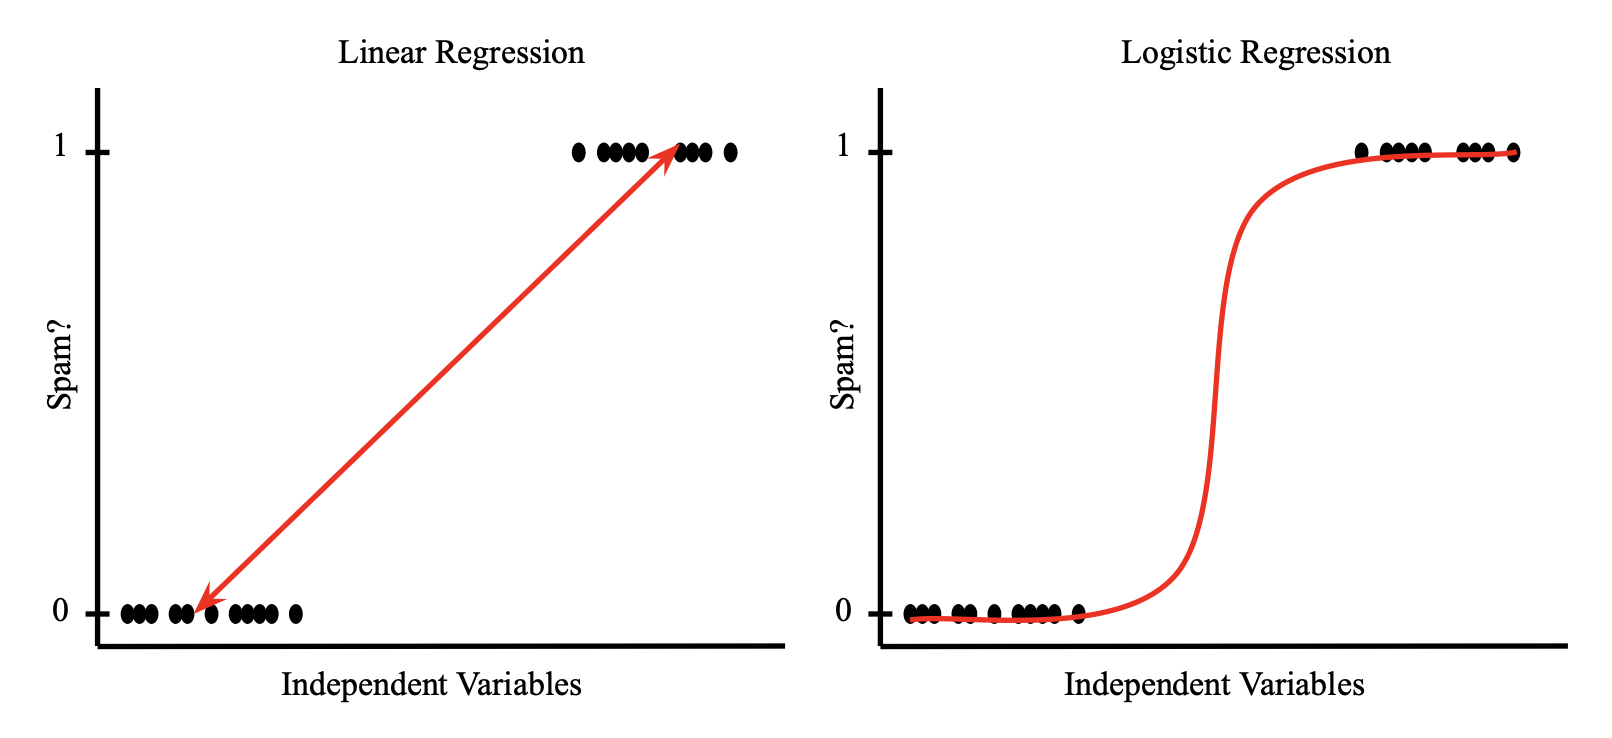

For this particular model, we are using a binary logistic regression, as the message is considered either spam or ham and does not have any sequential ordering. The variables influencing the logistic regression are shown in the table above, or described in the definitions in [section one](#New-Variable-Definitions). 

After fitting the data and creating predictions based on the testing data, the section [Displaying and Calculating Results](#Displaying-and-Calculating-LR-Results) shows various statistical results from fitting a logistic model to the training data.  
#### Fitting and Testing the LR Model
In this sub-section of [Logistic Regression Test](#Logistic-Regression-Test), the code is fitting the logistic regression model to the training data and then making prediction based on the testing x-values in the testing data. First, we create the logistic regression model with a max iterations value of 1000, meaning that the maximum number of iterations before the solver converges is 1000, which is used for optimizing the results. Next, we fit the model to the training data by inputting the values of the independent variables, listed above, as X and the training target values as y into the logistic regression fit function. 

Then, we make predictions using the logistic model and the prediction function by taking in the x testing values. In other word, the logistic model is first trained on the training data, and uses such knowledge and inputted testing data to make predictions about a dichotomous, categorical variable, `Spam?`. Just as a human can train themselves using flashcards in preparation for a test, the logistic model trains itself upon the independent and dependent variables of a training set to make predictions about a testing set. 

In [61]:
# Test One: Fitting the Model and Making Predictions on Testing Data

# Fit the Model
num_log = X_train.values
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X=num_log, y=y_train_target)

# Make Predictions
num_log1 = X_test.values
log_predicted = log_model.predict(num_log1)

#### Displaying and Calculating LR Results
This sub-section displays the accuracy of the logistic model's predictions on the testing data. The first ten predictions made by the logistic regression model are outputted with the first ten true values listed below it in a NumPy array. As you can see, the logistic regression model was able to accurately predict the first ten messages it was evaluated on, the results being `['Ham' 'Spam' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Spam' 'Ham']`. Below these two lists, the accuracy score for the logistic regression is displayed. The accuracy score was approximately .9507, meaning that the logistic regression model fit on the training data was able to accurately predict about 95% of the values in the testing data. In other words, the logistic regression classified a message as `Spam` or `Ham` incorrectly 5% of the time. Lastly, the Confusion Matrix Diagram is show, exhibiting the number of correct and incorrect classifications for spam and ham. As you can see, the model was able to accurately prediction a message was `Ham` 963 times, while failing to do so 16 times. This means that the model was accurate in predicting `Ham` message about 98.37% of the time. On the other hand, the model was able to accurately predict that 97 messages were `Spam` and 39 messages were `Ham`. That means that the model was able to accurately predict `Spam` messages only 71.33% of the time. As you can see the logistic regression model performed relatively poorly in predicting which messages were spam when the messages were spam when compared to accurately prediction ham messages as ham. This model, therefore, is not the best model to use when attempting to identify if a suspicious message is spam when the message is truly spam, as it was decently unsuccessful in doing so. 

The First Ten Predictions are:  ['Ham' 'Spam' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Spam' 'Ham']
The First Ten True Values are:  ['Ham' 'Spam' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Spam' 'Ham']
The Accuracy Score for the Logistic Regression is:  0.9506726457399103
The Confusion Matrix for the Logistic Regression is: 


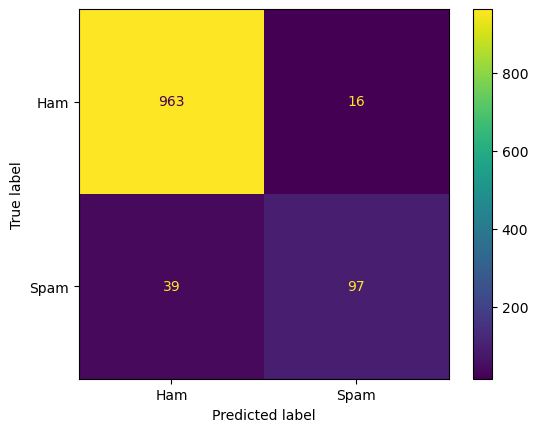

In [62]:
# Test One: Displaying and Calculating Results 

# Displaying Results in Confusion Matrix
ConfusionMatrixDisplay.from_estimator(estimator=log_model, X=num_log1, y=y_test_target)
plt.grid(False)

# Calculating and Printing Result Statistics 
score = accuracy_score(y_true = y_test_target, y_pred=log_predicted)
print("The First Ten Predictions are: ", log_predicted[:10])
print("The First Ten True Values are: ", np.array(y_test_target)[:10])
print("The Accuracy Score for the Logistic Regression is: ", score)
print("The Confusion Matrix for the Logistic Regression is: ")

### Multinomial Naive Bayes Test
The next test I used was a Multinomial Naive Bayes algorithm. This model is most commonly use to determine the tag placed on a particular input. In this particular scenario, the multinomial naive bayes algorithm is determining the probability that each message is spam and the probability that each message is ham. From there, it selects the more probable case and labels the message as spam or ham. In order to calculate the probabilities, the algorithm is considering the variables that were feature engineered into the dataframe, such as number of websites and number of non-alphanumeric characters, defined in the [New Variable Definitions](#New-Variable-Definitions) section. As with the [Bernoulli Naive Bayes](#Bernoulli-Naive-Bayes-Test) algorithm, the Multinomial Naives Bayes algorithm is dependendent on the Naive Bayes probability theoreom show below:

$ P(A|B) = P(A) * \frac{P(B|A)}{P(B)} $

However, this formula shows Naive Bayes in its simplest form, where there is one independent variable and one dependent variable. In the case of this analysis, one possible scenario could be:

$A$: The Message is Spam

$B$: The Message contains 2 phone references, 1 winning reference, 1 greeting, 2 website references, 0 non-alphanumeric letters, 3 money references, 54 characters, 4 spam words, and 2 ham words

Therefore, the equation would be adapted to take into consideration all of the independent variables in order to find the probability of the message being, in this case, spam. This equation will replace B with the intersection of each independent variable, as seen in the equation below. 

$ P(A|X_1 \cap X_2 \cap ... \cap X_9) = P(A) * \frac{P(X_1 \cap X_2 \cap ... \cap X_9)|A)}{P(X_1 \cap X_2 
\cap ... \cap X_9)}$

with the variables $A$ and $X_i$ with $i$ being the i-th variable (in no particular order) representing

$A$ : The message is spam 

$X_1$ : 2 Phone References 

$X_2$: 1 Winning Reference 

... 

$X_9$ : 2 Ham Words 


The algorithm will calculate the probability of the message being spam and the probability of the message being ham given information about the feature engineered factors in the data frame. From there, it will select the possibility with a higher probability as its prediction. 

#### Performing the MNB Test
This sub-section features the code chunk that performs the Multinomial Naive Bayes test. It first calls the MultinomialNB() function imported from the Scikit-Learn package. Then, the function is fit with the training data (both the x and y values) allowing the learning algorithm to train itself and develop an understanding of which variables have high values for spam messages and which have high values for ham messages. Lastly, the algorithm uses what it has learned and makes predictions about the independent variable (x values) of the testing data set. These predictions are stored as a numpy array consisting of string values "Spam" or "Ham."

In [76]:
# Test Two: Performing the MNB Test
mnb = MultinomialNB()
mnb.fit(X_train, y_train_target)
y_pred = mnb.predict(X_test)

#### Displaying and Calculating MNB Results


The First Ten Predictions are:  ['Ham' 'Spam' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Spam' 'Ham']
The First Ten True Values are:  ['Ham' 'Spam' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Spam' 'Ham']
The Accuracy Score for the Logistic Regression is:  0.9255605381165919
The Confusion Matrix for the Logistic Regression is: 



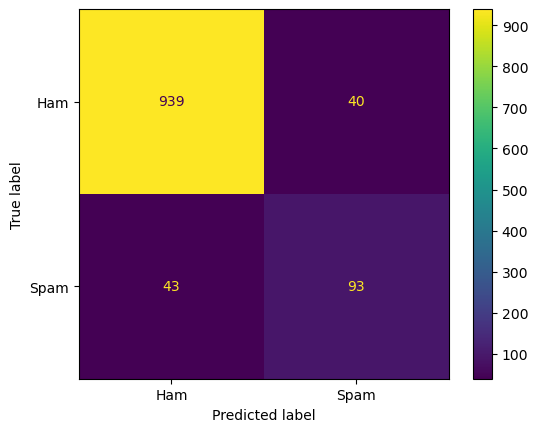

In [64]:
# Test Two: Displaying and Calculating Results 

# Displaying Results in Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_true=y_test_target, y_pred=y_pred)
plt.grid(False)

# Calculating and Printing Result Statistics 
mnb_score = accuracy_score(y_true = y_test_target, y_pred=y_pred)
print("The First Ten Predictions are: ", log_predicted[:10])
print("The First Ten True Values are: ", np.array(y_test_target)[:10])
print("The Accuracy Score for the Logistic Regression is: ", mnb_score)
print("The Confusion Matrix for the Logistic Regression is: \n")

### Bernoulli Naive Bayes Test
#### Preparing the BNB Dataframe

In [70]:
# Test Three: Creating the Boolean Dataframe for BernoulliNB
bernoulli_df = pd.DataFrame({})
bernoulli_df["Spam?"] = spam_df["Spam?"]
bernoulli_df["Message"] = spam_df["Message"]
bernoulli_df["Variable"] = spam_df["Variable"]
bernoulli_df["Phone_Related"] = np.where(spam_df["num_phone_related"] > 0, True, False)
bernoulli_df["Winner_Related"] = np.where(spam_df["num_winner"] > 0, True, False)
bernoulli_df["Website_Related"] = np.where(spam_df["num_of_website"] > 0, True, False)
bernoulli_df["Random_Letters"] = np.where(spam_df["num_rand_letters"] > 0, True, False)
bernoulli_df["Greetings"] = np.where(spam_df["greetings"] > 0, True, False)
bernoulli_df["Money_Related"] = np.where(spam_df["num_money"] > 0, True, False)

bernoulli_data = bernoulli_df.drop(columns=["Spam?", "Message", "Variable"])
bernoulli_target = bernoulli_df["Variable"]
X_train_bnb, X_test_bnb, y_train_target_bnb, y_test_target_bnb = train_test_split(bernoulli_data, bernoulli_target, test_size = 0.3, random_state=999)
X_train_bnb.head()

,Phone_Related,Winner_Related,Website_Related,Random_Letters,Greetings,Money_Related
4624,False,False,False,False,False,False
3815,False,False,False,False,False,False
3252,False,False,False,False,False,False
1348,False,False,False,False,True,False
3651,False,False,False,False,False,False


#### Performing the BNB Test

In [71]:
# Test Three: Performing the BNB Test
bnb = BernoulliNB()
bnb.fit(X_train_bnb, y_train_target_bnb)
y_pred = bnb.predict(X_test_bnb)

#### Displaying and Calculating BNB Results

The First Ten Predictions are:  ['Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Spam' 'Ham']
The First Ten True Values are:  ['Ham' 'Spam' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Spam' 'Ham']
The Accuracy Score for the Logistic Regression is:  0.93122009569378
The Confusion Matrix for the Logistic Regression is: 



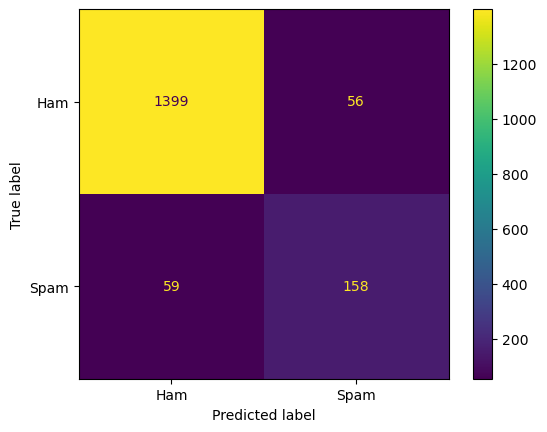

In [72]:
# Test Three: Displaying and Calculating Results

# Displaying the Results in a Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_true=y_test_target_bnb, y_pred=y_pred)
plt.grid(False)

# Calculating and Printing Result Statistics
bnb_score = accuracy_score(y_true = y_test_target_bnb, y_pred=y_pred)
print("The First Ten Predictions are: ", y_pred[:10])
print("The First Ten True Values are: ", np.array(y_test_target_bnb)[:10])
print("The Accuracy Score for the Logistic Regression is: ", bnb_score)
print("The Confusion Matrix for the Logistic Regression is: \n")

### Count Vectorizer Test
#### Preparing the CV Dataframe

In [23]:
# Count Vectorizer 
cv_data = spam_df["Message"]
cv_target = spam_df["Variable"]
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(cv_data, cv_target, test_size = 0.2, random_state=999)
X_train.head()

,num_phone_related,num_winner,greetings,num_of_website,num_rand_letters,num_money,length_of_mess,spam_word_count,ham_word_count
2889,0,0,0,0,0,0,54,8,10
2751,0,0,0,1,0,0,37,7,7
4162,0,0,0,1,0,0,35,5,6
1322,0,0,0,0,0,0,34,4,5
2351,2,0,0,0,0,0,120,13,15


#### Performing the CV Test

In [24]:
count_vect = CountVectorizer()
cv_features = count_vect.fit_transform(X_train_cv)
model = svm.SVC()
model.fit(cv_features,y_train_cv)
features_test = count_vect.transform(X_test_cv)
print("Accuracy: {}".format(model.score(features_test,y_test_cv)))
print(features_test)

Accuracy: 0.9865470852017937
  (0, 872)	1
  (0, 1456)	1
  (0, 1657)	1
  (0, 3124)	1
  (0, 3724)	1
  (0, 4385)	1
  (0, 4859)	1
  (0, 5882)	1
  (0, 5936)	1
  (0, 6797)	1
  (0, 6879)	2
  (0, 7290)	1
  (0, 7405)	1
  (1, 376)	1
  (1, 585)	1
  (1, 1622)	1
  (1, 1759)	1
  (1, 2350)	1
  (1, 3174)	1
  (1, 3619)	1
  (1, 3945)	1
  (1, 4124)	1
  (1, 4126)	1
  (1, 4133)	1
  (1, 4454)	1
  :	:
  (1112, 2406)	1
  (1112, 3142)	1
  (1112, 3299)	1
  (1112, 3736)	1
  (1112, 4481)	1
  (1112, 4634)	1
  (1112, 4741)	2
  (1112, 4973)	1
  (1112, 5274)	1
  (1112, 6797)	1
  (1112, 6915)	1
  (1112, 7123)	1
  (1112, 7323)	1
  (1112, 7348)	1
  (1112, 7477)	1
  (1112, 7632)	1
  (1113, 2413)	1
  (1113, 4796)	1
  (1113, 5936)	1
  (1113, 7433)	1
  (1113, 7605)	1
  (1114, 3515)	1
  (1114, 5131)	1
  (1114, 6449)	1
  (1114, 6756)	1


## Results and Conclusions

## Citations and References

Site
https://www.codingninjas.com/studio/library/spam-ham-classification-using-naive-bayes#:~:text=Ham%20refers%20to%20genuine%20mail,Naive%20Bayes%20in%20machine%20learning.
https://www.upgrad.com/blog/multinomial-naive-bayes-explained/

https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python#
https://blog.logrocket.com/email-spam-detector-python-machine-learning/